In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

flatui = ["#9b59b6", "#3498db", '#a9a9a9', '#008000', '#b8860b', '#7b68ee']
sns.set_palette(sns.color_palette(flatui))


pth='/home/morteza/dlc_projects/Analysis/Currencodes/TDA/Visualization/simplex_proj/simplex_head/' #GET A LIST OF DATA
dset=[]


for root, dirs, files in os.walk(pth):
    for fname in files:         #8 third 
        if fname.endswith('csv') :
            case=root+'/'+fname #construct the path to file
            df=pd.read_csv(case).dropna()   #read Body_head
                
            for j in np.unique(df['dimension'].values):
                    
                dset.append((fname[8:11], fname[11:14], j , np.mean(df[df['dimension']==j]['prediction_length'])))

simplex_df=pd.DataFrame(dset, columns=['treatment', 'ID', 'dimension', 'predicted_length'])


In [29]:
pth='/home/morteza/dlc_projects/Analysis/Currencodes/TDA/Visualization/simplex_proj/shuffle/' #GET A LIST OF DATA
dset=[]


for root, dirs, files in os.walk(pth):
    for fname in files:         #8 third 
        if fname.endswith('csv') :
            case=root+'/'+fname #construct the path to file
            df=pd.read_csv(case).dropna()   #read Body_head
                
            for j in np.unique(df['dimension'].values):
                    
                dset.append(('scrambled', fname[11:14], j , np.mean(df[df['dimension']==j]                                                                                        ['prediction_length'])))

shuffle_df=pd.DataFrame(dset, columns=['treatment', 'ID', 'dimension', 'predicted_length'])



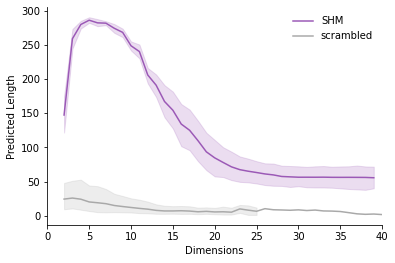

In [30]:
final_df=simplex_df.append(shuffle_df)


flatui = ["#9b59b6",'#a9a9a9']
sns.set_palette(sns.color_palette(flatui))


sns.lineplot(x='dimension', y='predicted_length', hue='treatment', data=final_df.loc[final_df['treatment'].isin(['SHM','scrambled'])])

plt.legend(frameon=False)

plt.xlim(0,40)

plt.xlabel('Dimensions')
plt.ylabel('Predicted Length')
sns.despine()
plt.savefig('sham_prediction')

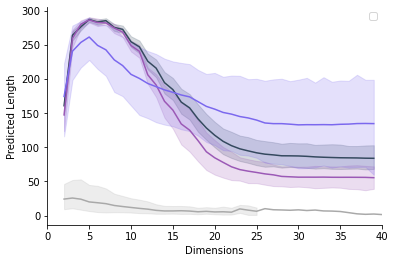

In [39]:
flatui = [ "#34495e","#9b59b6", '#7b68ee','#a9a9a9']
sns.set_palette(sns.color_palette(flatui))

final_df=simplex_df.append(shuffle_df)


sns.lineplot(x='dimension', y='predicted_length', hue='treatment', data=final_df.loc[final_df['treatment'].isin(['LID','LES','SHM', 'scrambled'])])

plt.legend([],[])

plt.xlim(0,40)

plt.xlabel('Dimensions')
plt.ylabel('Predicted Length')
sns.despine()

plt.savefig('simplex_line_head.svg')

(150.0, 300.0)

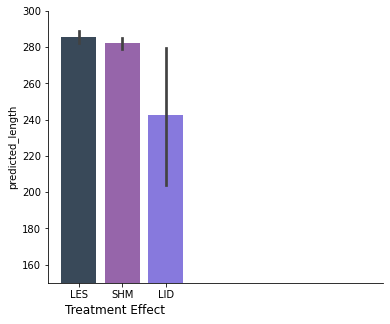

In [32]:
flatui = [ "#34495e","#9b59b6", '#7b68ee']
sns.set_palette(sns.color_palette(flatui))

fig1 = plt.figure(figsize=(6, 5))
ax1=fig1.add_subplot(111)



sns.barplot(x='treatment', y='predicted_length', data=final_df.loc[final_df['dimension'].isin([7])],ax=ax1,
                             order=[ 'LES','SHM', 'LID'])
sns.despine()

plt.xlim(-.7, 7)
plt.xlabel('Treatment Effect', fontsize='large', position=[0.2,0.1])
plt.xlabel('Treatment Effect', fontsize='large', position=[0.2,0.1])
plt.ylim(150, 300)

In [33]:
from scipy import stats
import numpy as np

g1=np.array(final_df['predicted_length'].loc[(final_df['dimension']==6) & (final_df['treatment']=='LES')])
g2=np.array(final_df['predicted_length'].loc[(final_df['dimension']==6) &( final_df['treatment']=='LID')])

print(stats.ks_2samp(g1,g2)[1])
print(stats.ttest_ind(g1,g2)[1])

0.17916074307162444
0.0009460768104518229


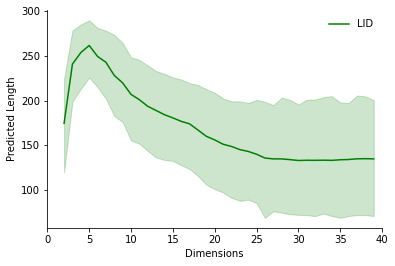

In [34]:
flatui = ['#008000', '#b8860b', '#7b68ee']
sns.set_palette(sns.color_palette(flatui))



sns.lineplot(x='dimension', y='predicted_length', hue='treatment', data=final_df.loc[final_df['treatment'].isin(['LID','SKF','SUM'])])
plt.legend(frameon=False)

plt.xlim(0,40)

plt.xlabel('Dimensions')
plt.ylabel('Predicted Length')
sns.despine()

(-0.5, 7.0)

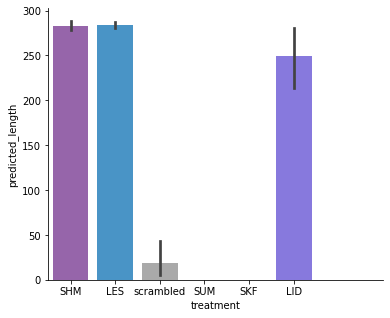

In [35]:
flatui = ["#9b59b6", "#3498db", '#a9a9a9', '#008000', '#b8860b', '#7b68ee']
sns.set_palette(sns.color_palette(flatui))

fig1 = plt.figure(figsize=(6, 5))
ax1=fig1.add_subplot(111)



sns.barplot(x='treatment', y='predicted_length', data=final_df.loc[final_df['dimension'].isin([6])],ax=ax1,
                             order=['SHM', 'LES', 'scrambled', 'SUM', 'SKF', 'LID'])
sns.despine()

plt.xlim(-.5, 7)

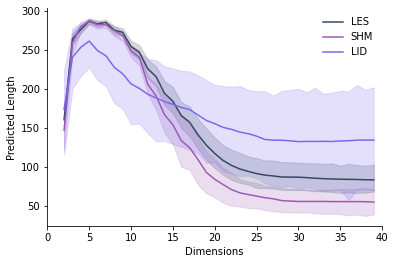

In [36]:
flatui = [ "#34495e","#9b59b6", '#7b68ee']
sns.set_palette(sns.color_palette(flatui))



sns.lineplot(x='dimension', y='predicted_length', hue='treatment', data=final_df.loc[final_df['treatment'].isin(['LES','SHM','LID'])])
plt.legend(frameon=False)

plt.xlim(0,40)

plt.xlabel('Dimensions')
plt.ylabel('Predicted Length')
sns.despine()

(-1.0, 5.0)

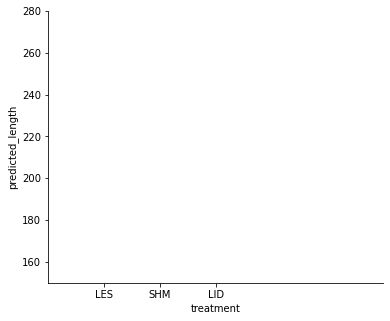

In [37]:
fig1 = plt.figure(figsize=(6, 5))
ax1=fig1.add_subplot(111)



sns.barplot(x='treatment', y='predicted_length', data=final_df.loc[final_df['dimension'].isin(['7'])],ax=ax1,
        order=['LES','SHM','LID'])
sns.despine()
plt.ylim(150, 280)
plt.xlim(-1, 5)

In [38]:
from scipy import stats
import numpy as np

g1=np.array(final_df['predicted_length'].loc[(final_df['dimension']==5) & (final_df['treatment']=='SHM')])
g2=np.array(final_df['predicted_length'].loc[(final_df['dimension']==5) &( final_df['treatment']=='LES')])

print(stats.ks_2samp(g1,g2)[1])
print(stats.ttest_ind(g1,g2)[1])

0.5365143947490346
0.8810103715307096
